# Rezolvarea problemei (pt datele v1) cu cod propriu (fara biblioteci specializate – e.g. sklearn, numpy, skit, opencv, etc)

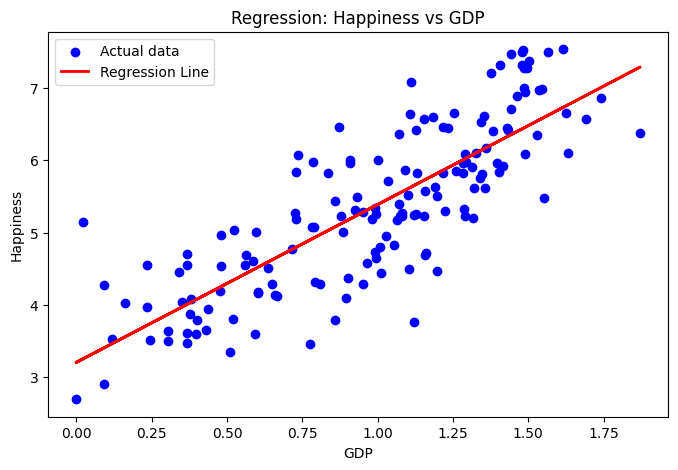

Model for Happiness vs GDP:
Slope: 2.184184946415088
Intercept: 3.2032126827021434
Mean Squared Error: 0.43215056726384016
R-squared Score: 0.6601054760877703


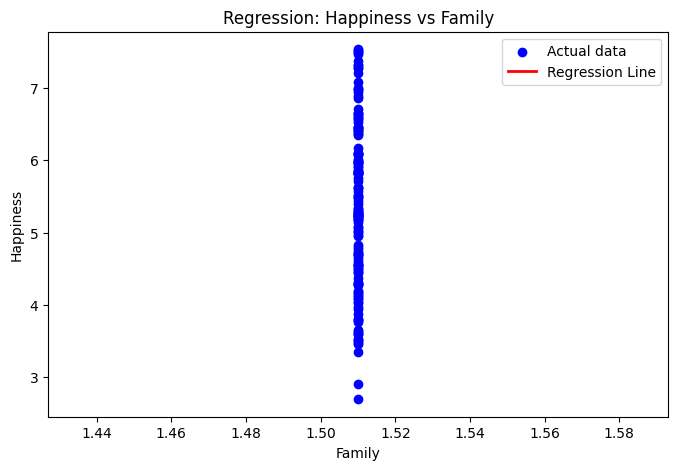

Model for Happiness vs Family:
Slope: 0.0
Intercept: 5.354019355774194
Mean Squared Error: 1.27142550662403
R-squared Score: 0.0


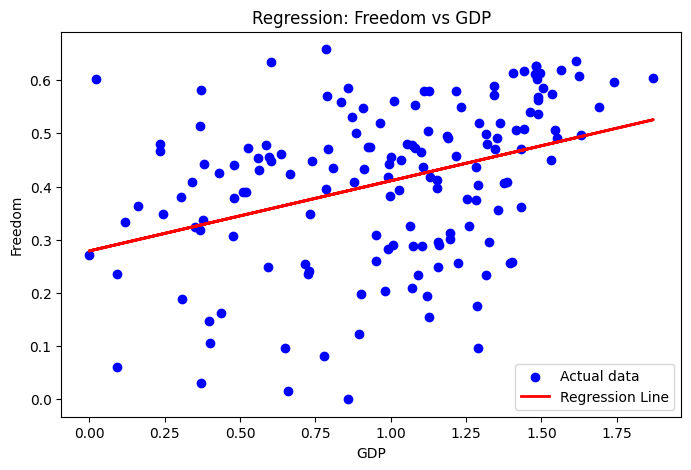

Model for Freedom vs GDP:
Slope: 0.13184641616906004
Intercept: 0.2789544070062843
Mean Squared Error: 0.019295861097195752
R-squared Score: 0.13680632593453668

Intercept: 2.546076701511472
Slope for GDP: 1.873592885921922
Slope for Freedom: 2.3557110577423908
Mean Squared Error: 0.32507060604578664
R-squared Score: 0.7443258733192047


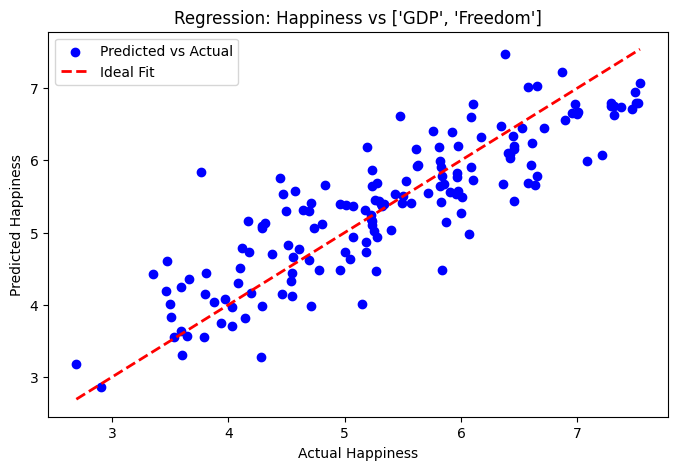

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/v1_world-happiness-report-2017.csv"
df = pd.read_csv(file_path)

features = {
    "GDP": "Economy..GDP.per.Capita.",
    "Family": "Family",
    "Freedom": "Freedom",
    "Happiness": "Happiness.Score"
}

def least_squares_regression(x_feature, y_feature):
    X = df[features[x_feature]].values
    y = df[features[y_feature]].values
    
    if np.isnan(X).any() or np.isnan(y).any():
        print(f"Skipping regression for {y_feature} vs {x_feature} due to NaN values.")
        return
    
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(y)
    sum_xy = np.sum(X * y)
    sum_x2 = np.sum(X * X)
    
    denominator = (n * sum_x2 - sum_x ** 2)
    if denominator == 0:
        print(f"Skipping regression for {y_feature} vs {x_feature} due to division by zero.")
        return
    
    slope = (n * sum_xy - sum_x * sum_y) / denominator
    intercept = (sum_y - slope * sum_x) / n
    
    y_pred = slope * X + intercept
    
    mse = np.mean((y - y_pred) ** 2)
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    plt.figure(figsize=(8,5))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Regression: {y_feature} vs {x_feature}')
    plt.legend()
    plt.show()
    
    print(f"Model for {y_feature} vs {x_feature}:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

def multiple_linear_regression(x_features, y_feature):
    X = df[[features[x] for x in x_features]].values
    y = df[features[y_feature]].values
    
    if np.isnan(X).any() or np.isnan(y).any():
        print(f"Skipping multiple regression for {y_feature} due to NaN values.")
        return
    
    X = np.c_[np.ones(X.shape[0]), X]
    
    try:
        coef = np.linalg.pinv(X.T @ X) @ X.T @ y
    except np.linalg.LinAlgError:
        print(f"Skipping multiple regression for {y_feature} due to singular matrix error.")
        return
    
    intercept = coef[0]
    slopes = coef[1:]
    
    print(f"Intercept: {intercept}")
    for i, feature in enumerate(x_features):
        print(f"Slope for {feature}: {slopes[i]}")
    
    y_pred = X @ coef
    
    mse = np.mean((y - y_pred) ** 2)
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")
    
    plt.figure(figsize=(8,5))
    plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2, linestyle='dashed', label='Ideal Fit')
    plt.xlabel(f'Actual {y_feature}')
    plt.ylabel(f'Predicted {y_feature}')
    plt.title(f'Regression: {y_feature} vs {x_features}')
    plt.legend()
    plt.show()

least_squares_regression("GDP", "Happiness")
least_squares_regression("Family", "Happiness")
least_squares_regression("GDP", "Freedom")
multiple_linear_regression(["GDP", "Freedom"], "Happiness")